In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
import warnings

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# X and y variables 
X=df.drop(columns=['math score'])
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
num_feature = X.select_dtypes(exclude="str").columns
cat_feature = X.select_dtypes(include='str').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoding" , oh_transformer,cat_feature),
    ("StandardScaler",numeric_transformer,num_feature),
    ]
)



In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [12]:
X.shape

(1000, 19)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [14]:
# function for metrics

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)

    return mae,mse,rmse,r2_square

In [15]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "svm":SVR(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "Xgboost":XGBRegressor(),
    "catboost":CatBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print(f"- Mean Squared Error: {model_train_mse}")
    print(f"- mean absolute Error: {model_train_mae}")
    print(f"- Root Mean Squared Error: {model_train_rmse}")
    print(f"- R2 score: {model_train_r2}")

    print("-----------------------------------------------------")

    print("Model Performance for testing Set")
    print(f"- Mean Squared Error: {model_test_mse}")
    print(f"- mean absolute Error: {model_test_mae}")
    print(f"- Root Mean Squared Error: {model_test_rmse}")
    print(f"- R2 score: {model_test_r2}")

    r2_list.append(model_test_r2)


    print("="*40)
    print('\n')


Linear Regression
Model Performance for Training Set
- Mean Squared Error: 28.334870380648585
- mean absolute Error: 4.266711846071957
- Root Mean Squared Error: 5.323050852720513
- R2 score: 0.8743172040139593
-----------------------------------------------------
Model Performance for testing Set
- Mean Squared Error: 29.095169866715484
- mean absolute Error: 4.21476314247485
- Root Mean Squared Error: 5.393993869732842
- R2 score: 0.8804332983749565


Lasso
Model Performance for Training Set
- Mean Squared Error: 43.47840400585579
- mean absolute Error: 5.206302661246528
- Root Mean Squared Error: 6.593815587795566
- R2 score: 0.8071462015863456
-----------------------------------------------------
Model Performance for testing Set
- Mean Squared Error: 42.50641683841163
- mean absolute Error: 5.157881810347763
- Root Mean Squared Error: 6.519694535667421
- R2 score: 0.8253197323627852


Ridge
Model Performance for Training Set
- Mean Squared Error: 28.33778823308244
- mean absolute 

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model_name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,Random Forest,0.853403
9,catboost,0.851632
7,Adaboost,0.847193
8,Xgboost,0.827797
1,Lasso,0.825320
3,KNN,0.783813
5,Decision Tree,0.766950
4,svm,0.728600


In [18]:
# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

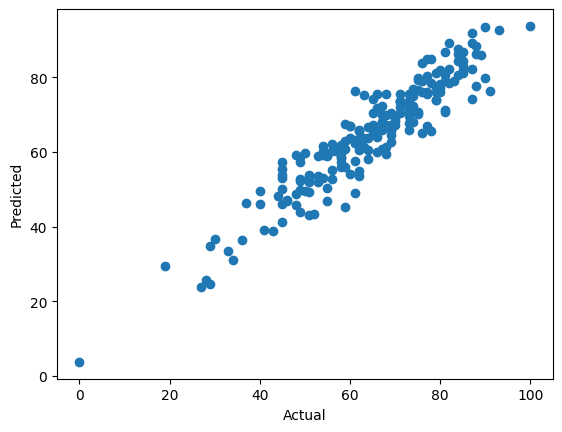

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

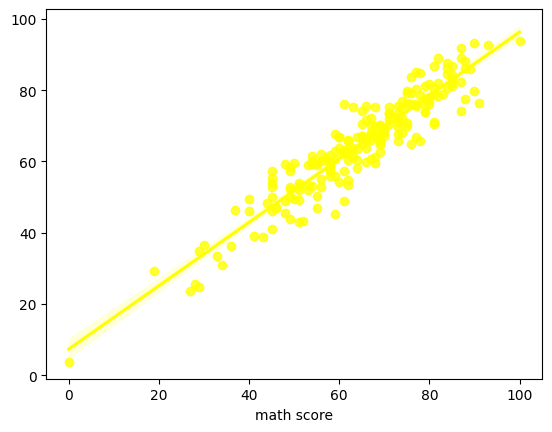

In [22]:
sns.regplot(x=y_test,y=y_pred,color='yellow')

In [23]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
